In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import copy

In [2]:
data_train = np.array(np.loadtxt("/content/Dry_Bean_train.csv", delimiter = ",", dtype = str,skiprows= 1))
data_test = np.array(np.loadtxt("/content/Dry_Bean_test.csv", delimiter = ",", dtype = str,skiprows= 1))

In [3]:
x_train = data_train[:,:-1].astype(float)
x_label = data_train[:,-1]
y_test = data_test[:,:-1].astype(float)
y_label = data_test[:,-1]

In [4]:
scaler = StandardScaler()
scaler.fit(x_train)
x_trainnorm = scaler.transform(x_train)
scaler.fit(y_test)
y_testnorm = scaler.transform(y_test)

In [5]:
#Initializing the Weights
w = np.ones([1,17])

In [6]:
x0 = copy.deepcopy(x_trainnorm)
x1 = copy.deepcopy(x_trainnorm)
x2 = copy.deepcopy(x_trainnorm)
x3 = copy.deepcopy(x_trainnorm)
x4 = copy.deepcopy(x_trainnorm)
x5 = copy.deepcopy(x_trainnorm)
x6 = copy.deepcopy(x_trainnorm)

In [7]:
def ref(x,y,c):
  z = np.zeros([y.shape[0],1])
  for i in range(y.shape[0]):
    if y[i] == c:
      z[i] = 1
    else:
      z[i] = -1
  xn = np.column_stack((np.ones([x.shape[0],1],dtype=float),x))
  g = np.multiply(xn, z)
  return xn, g,z

In [8]:
def convert(x_label):
  xlabel = np.zeros(x_label.shape)
  for j in range(int(x_label.shape[0])):
    if x_label[j] == 'SEKER':
      xlabel[j] = 0
    elif x_label[j] == 'DERMASON':
      xlabel[j] = 1
    elif x_label[j] == 'BOMBAY':
      xlabel[j] = 2
    elif x_label[j] == 'HOROZ':
      xlabel[j] = 3
    elif x_label[j] == 'CALI':
      xlabel[j] = 4
    elif x_label[j] == 'SIRA':
      xlabel[j] = 5
    else:
      xlabel[j] = 6
  return xlabel

In [9]:
#Converting string output values to numerical values
xlabel = convert(x_label)
ylabel = convert(y_label)

In [10]:
xn0, g0,z0 = ref(x_trainnorm,xlabel,0)
xn1, g1,z1 = ref(x_trainnorm,xlabel,1)
xn2, g2,z2 = ref(x_trainnorm,xlabel,2)
xn3, g3,z3 = ref(x_trainnorm,xlabel,3)
xn4, g4,z4 = ref(x_trainnorm,xlabel,4)
xn5, g5,z5 = ref(x_trainnorm,xlabel,5)
xn6, g6,z6 = ref(x_trainnorm,xlabel,6)

In [11]:
def crit(w,x):
  j = 0
  l = int(x.shape[0])
  for i in range(l):
    if (np.dot(w.T, x[i].T) <= 0):
      j = (j - np.dot(w.T, x[i,:].T))
  return j

In [12]:
def predict(w,x):
  w_pred = np.zeros([int(x.shape[0]),1])
  for i in range(int(x.shape[0])):
    z = np.dot(w.T, x[i,:])
    if z < 0:
      w_pred[i] = -1
    else:
      w_pred[i] = 1
  
  return w_pred

In [13]:
def error(x,y):
  count = 0
  for i in range(int(x.shape[0])):
    if x[i]!=y[i]:
      count = count + 1
  err = (count/int(x.shape[0]))*100
  return err

In [14]:
l = int(g0.shape[0])
epochs = 100
axis = []
w_out = np.zeros([1224900,17])
wout = []
w = np.ones([1,17])
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn0,g0,z0)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w, g[j].T)

    if z <= 0:
      w = w + 1*g[j]
      count = 0
    
    else:
      count = count + 1
    
    wout.append(w.T)
  
  

J_d = []
w_d = np.array(wout[-1000:])
for j in range(1000):
  J_d.append(crit(w_d[j,:],g))

w_opt0 = w_d[np.argmin(J_d),:].reshape([1,17])
print('The optimal weights are:', w_opt0)

#train_label = predict(w_opt.T,xn)
#print('The training classification error is:', error(train_label, xn_label))

#test_xn = np.column_stack((np.ones([y_test.shape[0],1],dtype=float),y_test))
#test_label = predict(w_opt.T,test_xn)

The optimal weights are: [[ -35.          -31.12566104  -26.45288323   15.87479201  -51.57968269
    -5.56417824  -18.9797195   -37.1802795    -6.91510494    0.72900312
     0.63247151   -2.34249758  -27.06256518 -104.30910161   23.74582647
   -28.00370198    6.25823555]]


In [31]:
import numpy as np 
import matplotlib.pyplot as plt

def plot_multiclass_histograms(X_aug, W, y, fname, norm_W=False, scale=1, class_names=None):
    """
    Keith Chugg, USC, 2023.

    X_aug: shape: (N, D + 1).  Augmented data matrix
    W: shape: (D + 1, C).  The matrix of augmented weight-vectors.  W.T[m] is the weight vector for class m
    y: length N array with int values with correct classes.  Classes are indexed from 0 up.
    fname: a pdf of the histgrams will be saved to filename fname
    norm_W: boolean.  If True, the w-vectors for each class are normalized.
    scale: use scale < 1 to make the figure smaller, >1 to make it bigger
    class_names: pass a list of text, descriptive names for the classes.  

    This function takes in the weight vectors for a linear classifier and applied the "maximum value methd" -- i.e., 
    it computes the argmax_m g_m(x), where g_m(x) = w_m^T x to find the decision. For each class, it plots the historgrams 
    of  g_m(x) when class c is true.  This gives insights into which classes are most easily confused -- i.e., similar to a 
    confusion matrix, but more information.  

    Returns: the overall misclassification error percentage
    """
    if norm_W:
       W = W / np.linalg.norm(W, axis=0)
    y_soft = X_aug @ W
    N, C = y_soft.shape
    y_hard = np.argmax(y_soft, axis=1)
    error_percent = 100 * np.sum(y != y_hard) / len(y) 

    fig, ax = plt.subplots(C, sharex=True, figsize=(14 * scale, 6 * C * scale))
    y_soft_cs = []
    conditional_error_rate = np.zeros(C)
    if class_names is None:
        class_names = [f'Class {i}' for i in range(C)]
    for c_true in range(C):
        y_soft_cs.append(X_aug[y == c_true] @ W)
        y_hard_c = np.argmax(y_soft_cs[c_true], axis=1)
        conditional_error_rate[c_true] = 100 * np.sum(y_hard_c != c_true) / len(y_hard_c)
    for c_true in range(C):
        peak = -100
        for c in range(C):
            hc = ax[c_true].hist(y_soft_cs[c_true].T[c], bins = 100, alpha=0.4, label=class_names[c])
            peak = np.maximum(np.max(hc[0]), peak)
            ax[c_true].legend()
            ax[c_true].grid(':')
        ax[c_true].text(0, 0.9 * peak, f'True: {class_names[c_true]}\nConditional Error Rate = {conditional_error_rate[c_true] : 0.2f}%')
    if norm_W:
        ax[C-1].set_xlabel(r'nromalized discriminant function $g_m(x) / || {\bf w} ||$')
    else:
        ax[C-1].set_xlabel(r'discriminant function $g_m(x)$')
    plt.savefig(fname, bbox_inches='tight',)
    return error_percent

In [ ]:
train_label = predict(w_opt0.T,xn)

In [ ]:
train_label


array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [ ]:
np.where(xn_label==1)[0].shape

(1190,)

In [17]:
train_label = predict(w_opt0.T,xn)
print('The training classification error is:', error(train_label, xn_label))

The training classification error is: 1.6899338721528288


In [18]:
l = int(g0.shape[0])
epochs = 100
axis = []
w_out = np.zeros([1224900,17])
wout = []
w = np.ones([1,17])
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn1,g1,z1)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w, g[j].T)

    if z <= 0:
      w = w + 1*g[j]
      count = 0
    
    else:
      count = count + 1
    
    wout.append(w.T)
  
  

J_d = []
w_d = np.array(wout[-1000:])
for j in range(1000):
  J_d.append(crit(w_d[j,:],g))

w_opt1 = w_d[np.argmin(J_d),:].reshape([1,17])
print('The optimal weights are:', w_opt1)

train_label = predict(w_opt1.T,xn)
print('The training classification error is:', error(train_label, xn_label))

#test_xn = np.column_stack((np.ones([y_test.shape[0],1],dtype=float),y_test))
#test_label = predict(w_opt.T,test_xn)

The optimal weights are: [[-15.          -5.53968894  20.34738125  -7.60454332  11.69812784
    0.27872034  58.57992826 -13.58668423   3.33568907  -1.16951246
    0.24835899   6.26774892  24.07902055  13.16562113  27.62802012
   13.07798961  -1.33940301]]
The training classification error is: 4.628949301983836


In [19]:
l = int(g2.shape[0])
epochs = 100
axis = []
w_out = np.zeros([1224900,17])
wout = []
w = np.ones([1,17])
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn2,g2,z2)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w, g[j].T)

    if z <= 0:
      w = w + 1*g[j]
      count = 0
    
    else:
      count = count + 1
    
    wout.append(w.T)
  
  

J_d = []
w_d = np.array(wout[-1000:])
for j in range(1000):
  J_d.append(crit(w_d[j,:],g))

w_opt2 = w_d[np.argmin(J_d),:].reshape([1,17])
print('The optimal weights are:', w_opt2)

train_label = predict(w_opt2.T,xn)
print('The training classification error is:', error(train_label, xn_label))

#test_xn = np.column_stack((np.ones([y_test.shape[0],1],dtype=float),y_test))
#test_label = predict(w_opt.T,test_xn)

The optimal weights are: [[-20.           5.33955532   0.14635075   0.38765129   3.11844418
   -1.64648944   1.9919739    5.43457965   1.79800667   0.13205084
   -1.38233906   8.37263078   2.29063821   5.81963779   2.2212768
    1.79974225   1.91490217]]
The training classification error is: 0.0


In [20]:
l = int(g3.shape[0])
epochs = 100
axis = []
w_out = np.zeros([1224900,17])
wout = []
w = np.ones([1,17])
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn3,g3,z3)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w, g[j].T)

    if z <= 0:
      w = w + 1*g[j]
      count = 0
    
    else:
      count = count + 1
    
    wout.append(w.T)
  
  

J_d = []
w_d = np.array(wout[-1000:])
for j in range(1000):
  J_d.append(crit(w_d[j,:],g))

w_opt3 = w_d[np.argmin(J_d),:].reshape([1,17])
print('The optimal weights are:', w_opt3)

train_label = predict(w_opt3.T,xn)
print('The training classification error is:', error(train_label, xn_label))

#test_xn = np.column_stack((np.ones([y_test.shape[0],1],dtype=float),y_test))
#test_label = predict(w_opt.T,test_xn)

The optimal weights are: [[-34.         -45.80130587  12.04462781   2.4472826   -8.81778428
   68.59138794   7.32291432 -47.66528406 -11.34328827  -0.93288868
    4.78536269  -3.81787432  12.53501766 -49.92895088   1.39090884
   28.99217008 -10.1869204 ]]
The training classification error is: 1.4531798514164422


In [21]:
l = int(g4.shape[0])
epochs = 100
axis = []
w_out = np.zeros([1224900,17])
wout = []
w = np.ones([1,17])
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn4,g4,z4)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w, g[j].T)

    if z <= 0:
      w = w + 1*g[j]
      count = 0
    
    else:
      count = count + 1
    
    wout.append(w.T)
  
  

J_d = []
w_d = np.array(wout[-1000:])
for j in range(1000):
  J_d.append(crit(w_d[j,:],g))

w_opt4 = w_d[np.argmin(J_d),:].reshape([1,17])
print('The optimal weights are:', w_opt4)

train_label = predict(w_opt2.T,xn)
print('The training classification error is:', error(train_label, xn_label))

#test_xn = np.column_stack((np.ones([y_test.shape[0],1],dtype=float),y_test))
#test_label = predict(w_opt.T,test_xn)

The optimal weights are: [[ -52.          -32.47818671  -32.19592953   69.37088208  -76.78704552
   -65.78820697   30.27282024  -10.78706197   -5.0322807     0.47830439
    -0.87135406   10.73341975  -35.61997299 -138.03035845   69.48445584
   -64.7992463    -3.93683627]]
The training classification error is: 15.813535798840721


In [22]:
l = int(g5.shape[0])
epochs = 100
axis = []
w_out = np.zeros([1224900,17])
wout = []
w = np.ones([1,17])
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn5,g5,z5)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w, g[j].T)

    if z <= 0:
      w = w + 1*g[j]
      count = 0
    
    else:
      count = count + 1
    
    wout.append(w.T)
  
  

J_d = []
w_d = np.array(wout[-1000:])
for j in range(1000):
  J_d.append(crit(w_d[j,:],g))

w_opt5 = w_d[np.argmin(J_d),:].reshape([1,17])
print('The optimal weights are:', w_opt5)

train_label = predict(w_opt5.T,xn)
print('The training classification error is:', error(train_label, xn_label))

#test_xn = np.column_stack((np.ones([y_test.shape[0],1],dtype=float),y_test))
#test_label = predict(w_opt.T,test_xn)

The optimal weights are: [[ -27.           10.96673053 -176.71068657   12.7184032    -5.34906382
   -39.22653675  -15.46706976  -16.82886972   27.02553607   -0.38158351
     0.83570647  -23.69033653  -22.26830028  -89.65348536  -11.94341572
   -57.60108992   -0.18768787]]
The training classification error is: 5.861702996162952


In [23]:
l = int(g6.shape[0])
epochs = 100
axis = []
w_out = np.zeros([1224900,17])
wout = []
w = np.ones([1,17])
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn6,g6,z6)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w, g[j].T)

    if z <= 0:
      w = w + 1*g[j]
      count = 0
    
    else:
      count = count + 1
    
    wout.append(w.T)
  
  

J_d = []
w_d = np.array(wout[-1000:])
for j in range(1000):
  J_d.append(crit(w_d[j,:],g))

w_opt6 = w_d[np.argmin(J_d),:].reshape([1,17])
print('The optimal weights are:', w_opt6)

train_label = predict(w_opt6.T,xn)
print('The training classification error is:', error(train_label, xn_label))

#test_xn = np.column_stack((np.ones([y_test.shape[0],1],dtype=float),y_test))
#test_label = predict(w_opt.T,test_xn)

The optimal weights are: [[-38.         -26.9572715   54.46609583 -29.04871444 -14.36606689
  -51.28157168 -21.70343707 -14.29575035 -21.22343045   1.68109782
   -6.75243894   2.05330638  -8.83521031 -21.37826592 -74.32804866
  -23.95309039  10.70347192]]
The training classification error is: 1.6817699404032982


In [24]:
wd = np.vstack((w_opt0, w_opt1, w_opt2, w_opt3, w_opt4, w_opt5, w_opt6))

7.861866274797943

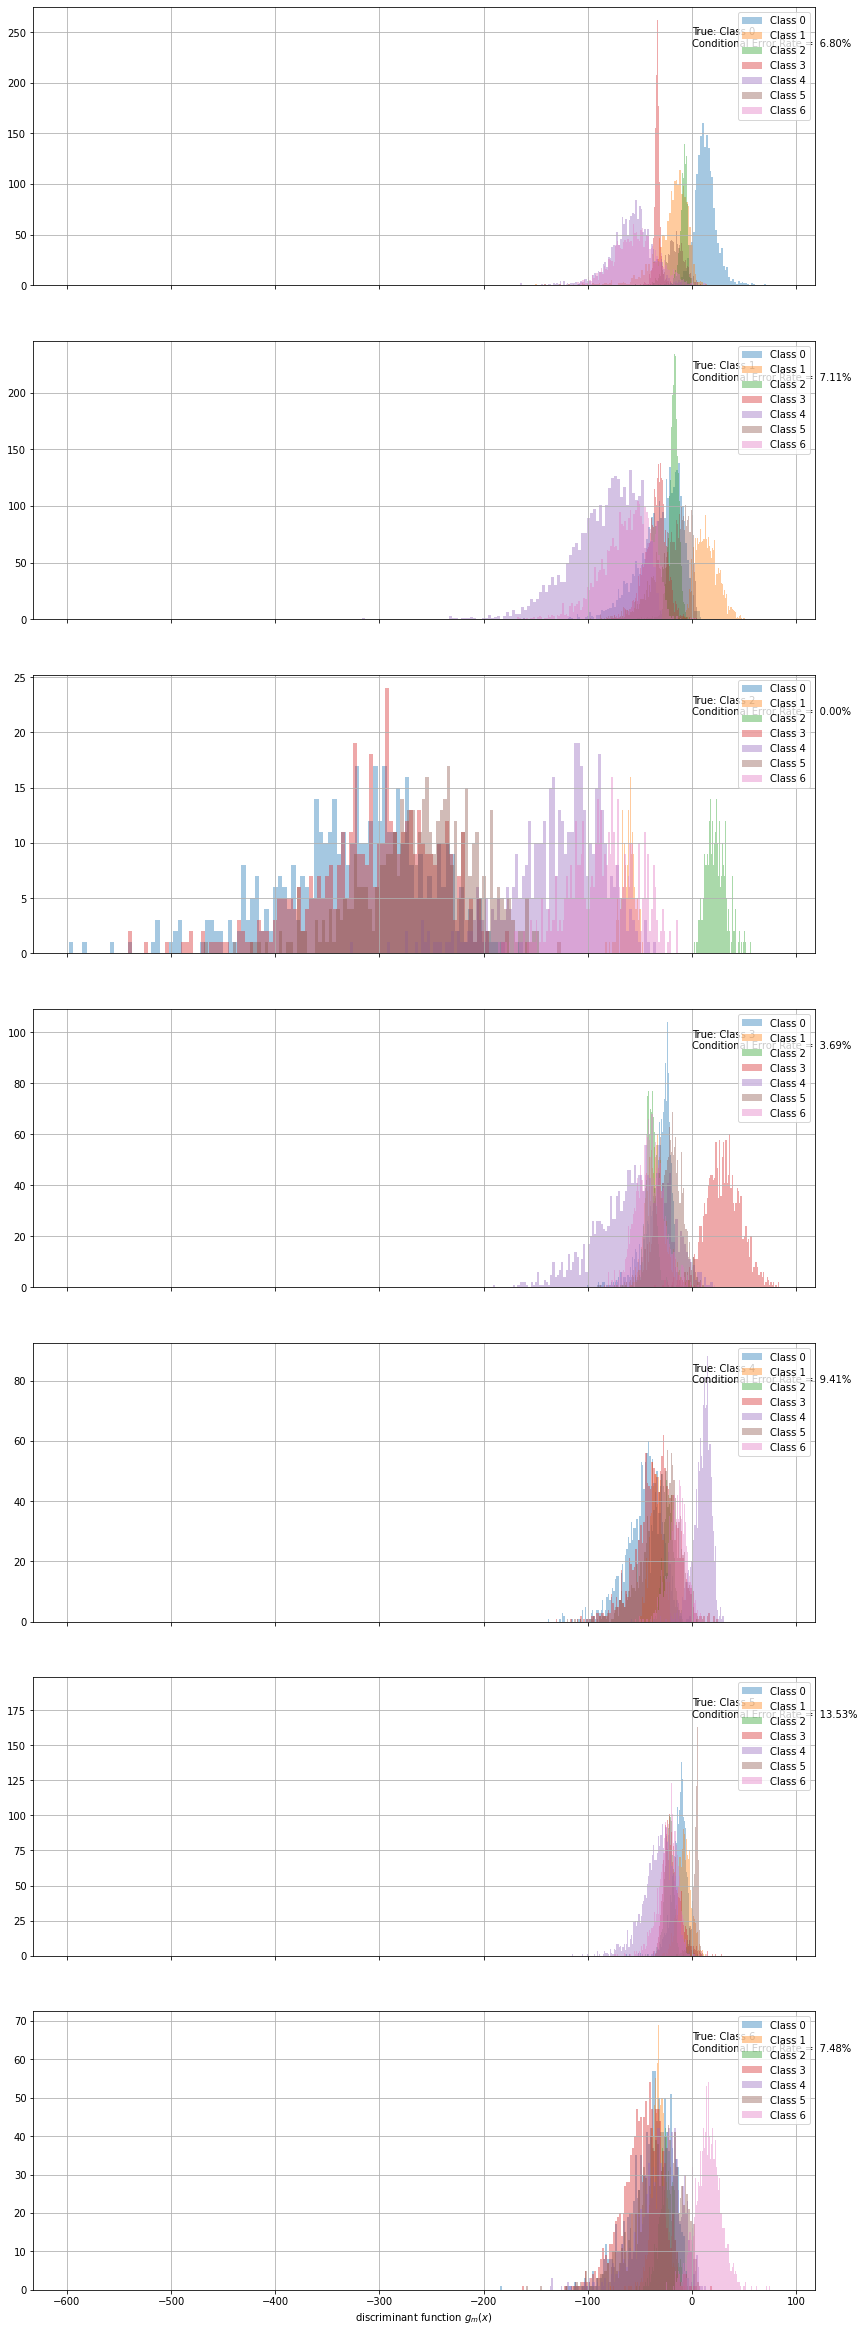

In [32]:
output = 'my_output_file'
plot_multiclass_histograms(xn0,wd.T,xlabel,f'{output}.pdf')

In [33]:
#b
train_arr = 0
train_err = 0
train_unclass = 0
for j in range(int(xn0.shape[0])):
  out = np.dot(wd, xn1[j].T)
  for i in range(len(out)):
    if out[i] > 0:
      out[i] = 1
    else:
      out[i] = 0
    
  if np.count_nonzero(out) == 1:
    train_label = np.argmax(out)
    if xlabel[j] == train_label:
        train_arr += 1
    else:
        train_err += 1
  else:
    train_unclass += 1

In [35]:
print("The accuracy on training set is:",100*train_arr/xn0.shape[0])
print("The error rate on training set is:", 100*train_err/xn0.shape[0])
print("The unclassified rate on training set is:",100*train_unclass/xn0.shape[0])

The accuracy on training set is: 87.72144664870602
The error rate on training set is: 5.126949138705201
The unclassified rate on training set is: 7.151604212588783


In [36]:
yn = np.column_stack((np.ones([y_testnorm.shape[0],1],dtype=float),y_testnorm))
test_arr = []
#b
test_arr = 0
test_err = 0
test_unclass = 0
for j in range(int(yn.shape[0])):
  out = np.dot(wd, yn[j].T)
  for i in range(len(out)):
    if out[i] > 0:
      out[i] = 1
    else:
      out[i] = 0
    
  if np.count_nonzero(out) == 1:
    test_label = np.argmax(out)
    if ylabel[j] == test_label:
        test_arr += 1
    else:
        test_err += 1
  else:
    test_unclass += 1
print("The accuracy on testing set is:",100*test_arr/yn.shape[0])
print("The error rate on testing set is:", 100*test_err/yn.shape[0])
print("The unclassified rate on testing set is:",100*test_unclass/yn.shape[0])

The accuracy on testing set is: 86.63729809104258
The error rate on testing set is: 5.212922173274596
The unclassified rate on testing set is: 8.14977973568282


In [ ]:
#c
train_arr = []
for j in range(int(xn0.shape[0])):
  out = np.argmax(np.dot(wd, xn1[j].T))
  train_arr.append(out)

train_arr = np.array(train_arr)
count = 0
err = error(train_arr, xlabel)
print("The accuracy on training set is:",100 - err)
print("The error rate on training set is:", err)
print("The unclassified rate on training set is:",0)



The accuracy on training set is: 91.9911829537105
The error rate on training set is: 8.008817046289494
The unclassified rate on training set is: 0


In [ ]:
#c
yn = np.column_stack((np.ones([y_testnorm.shape[0],1],dtype=float),y_testnorm))
test_arr = []
for j in range(int(yn.shape[0])):
  out = np.argmax(np.dot(wd, yn[j].T))
  test_arr.append(out)

test_arr = np.array(test_arr)
count = 0
err = error(test_arr, ylabel)
print("The accuracy on testing set is:",100 - err)
print("The error rate on testing set is:", err)
print("The unclassified rate on testing set is:",0)

The accuracy on testing set is: 90.96916299559471
The error rate on testing set is: 9.030837004405285
The unclassified rate on testing set is: 0


In [ ]:
#d
wd = np.vstack((w_opt0, w_opt1, w_opt2, w_opt3, w_opt4, w_opt5, w_opt6))
train_arr = []
x = wd[:,1:]
xnorm = np.linalg.norm(x, axis = 1)
for j in range(int(xn0.shape[0])):
  out = np.argmax((np.dot(wd,xn1[j].T))/xnorm)
  train_arr.append(out)

train_arr = np.array(train_arr)
count = 0
err = error(train_arr, xlabel)
print("The accuracy on training set is:",100 - err)
print("The error rate on training set is:", err)
print("The unclassified rate on training set is:",0)

The accuracy on training set is: 92.121805861703
The error rate on training set is: 7.878194138297004
The unclassified rate on training set is: 0


In [ ]:
#d
yn = np.column_stack((np.ones([y_testnorm.shape[0],1],dtype=float),y_testnorm))
wd = np.vstack((w_opt0, w_opt1, w_opt2, w_opt3, w_opt4, w_opt5, w_opt6))
test_arr = []
x = wd[:,1:]
xnorm = np.linalg.norm(x, axis = 1)
for j in range(int(yn.shape[0])):
  out = np.argmax((np.dot(wd, yn[j].T))/xnorm)
  test_arr.append(out)

test_arr = np.array(test_arr)
count = 0
err = error(test_arr, ylabel)
print("The accuracy on testing set is:",100 - err)
print("The error rate on testing set is:", err)
print("The unclassified rate on testing set is:",0)

The accuracy on testing set is: 90.6754772393539
The error rate on testing set is: 9.32452276064611
The unclassified rate on testing set is: 0


In [ ]:
w1 = np.ones([1,17])
np.dot(w1,g[1].T)

array([1.62082073])

In [ ]:
wd.shape

(7, 17)

In [ ]:
w_d = wout[-100:]

In [ ]:
len(w_d)

100

In [ ]:
w_d.shape

(100, 17, 1)